## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("stock_Indexes_2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [7]:
df['returns'] = df.market_value.pct_change(1)*100

## ARIMA(1,1,1)

In [8]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Fri, 13 Dec 2019   AIC                          55215.333
Time:                        23:06:34   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

## Residuals of the ARIMA(1,1,1)

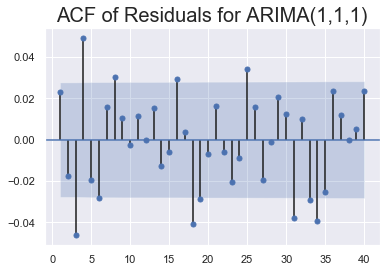

In [9]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF of Residuals for ARIMA(1,1,1)', size=20)
plt.show()

## Higher-Lag ARIMA Models

In [10]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)

In [12]:
print('ARIMA(1,1,1): \t LL = ', results_ar_1_i_1_ma_1.llf, '\t AIC = ', results_ar_1_i_1_ma_1.aic)
print('ARIMA(1,1,2): \t LL = ', results_ar_1_i_1_ma_2.llf, '\t AIC = ', results_ar_1_i_1_ma_2.aic)
print('ARIMA(1,1,3): \t LL = ', results_ar_1_i_1_ma_3.llf, '\t AIC = ', results_ar_1_i_1_ma_3.aic)
print('ARIMA(2,1,1): \t LL = ', results_ar_2_i_1_ma_1.llf, '\t AIC = ', results_ar_2_i_1_ma_1.aic)
print('ARIMA(3,1,1): \t LL = ', results_ar_3_i_1_ma_1.llf, '\t AIC = ', results_ar_3_i_1_ma_1.aic)
print('ARIMA(3,1,2): \t LL = ', results_ar_3_i_1_ma_2.llf, '\t AIC = ', results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1): 	 LL =  -27603.6664127732 	 AIC =  55215.3328255464
ARIMA(1,1,2): 	 LL =  -27600.081863117284 	 AIC =  55210.16372623457
ARIMA(1,1,3): 	 LL =  -27590.42403258626 	 AIC =  55192.84806517252
ARIMA(2,1,1): 	 LL =  -27599.80748786932 	 AIC =  55209.61497573864
ARIMA(3,1,1): 	 LL =  -27592.055371703955 	 AIC =  55196.11074340791
ARIMA(3,1,2): 	 LL =  -27590.660808971174 	 AIC =  55195.32161794235


In [14]:
# Which implies that the ARIMA(1,1,3) is optimal.
# Now run the LLR test to check if signicantly better than the
# nested models.
print('\nLLR test p-value ' + str(LLR_test(model_ar_1_i_1_ma_2, model_ar_1_i_1_ma_3)))
print('\nLLR test p-value ' + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_1_i_1_ma_3, DF=2)))


LLR test p-value 0.0

LLR test p-value 0.0


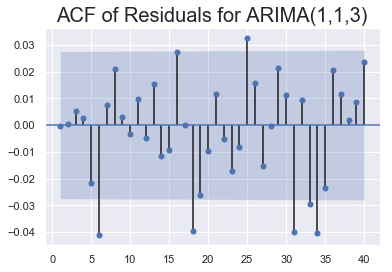

In [15]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero=False, lags=40)
plt.title('ACF of Residuals for ARIMA(1,1,3)', size=20)
plt.show()

In [16]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags=11)
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags=11)

In [17]:
print('ARIMA(1,1,3): \t LL = ', results_ar_1_i_1_ma_3.llf, '\t AIC = ', results_ar_1_i_1_ma_3.aic)
print('ARIMA(5,1,1): \t LL = ', results_ar_5_i_1_ma_1.llf, '\t AIC = ', results_ar_5_i_1_ma_1.aic)
print('ARIMA(6,1,3): \t LL = ', results_ar_6_i_1_ma_3.llf, '\t AIC = ', results_ar_6_i_1_ma_3.aic)

ARIMA(1,1,3): 	 LL =  -27590.42403258626 	 AIC =  55192.84806517252
ARIMA(5,1,1): 	 LL =  -27586.511888107034 	 AIC =  55189.02377621407
ARIMA(6,1,3): 	 LL =  -27583.56532040407 	 AIC =  55189.13064080814


In [20]:
print('\nLLR test p-value ' + str(LLR_test(model_ar_1_i_1_ma_3, model_ar_6_i_1_ma_3, DF=5)))
print('\nLLR test p-value ' + str(LLR_test(model_ar_5_i_1_ma_1, model_ar_6_i_1_ma_3, DF=3)))


LLR test p-value 0.018

LLR test p-value 0.117


In [ ]:
Thus ARIMA(6,1,3) is not significantly better than (5,1,1).

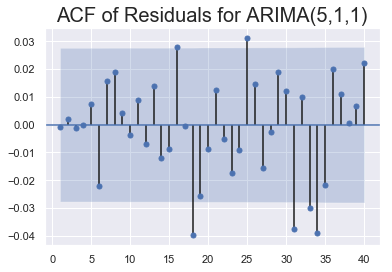

In [21]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF of Residuals for ARIMA(5,1,1)', size=20)
plt.show()

## Models with Higher Levels of Integration

In [23]:
df['delta_prices'] = df.market_value.diff(1)

In [24]:
# Check by comparing ARIMA(1,0,1) with delta_prices vs ARMA(1,1,1):
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Sat, 14 Dec 2019   AIC                          55215.333
Time:                        14:32:25   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.delta_prices    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
# Test for stationarity with the Augmented Dickey-Fuller Test:
sts.adfuller(df.delta_prices[1:])

(-32.24409349570747,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

Since the test implies stationarity, no need to compute higher levels.
For practice, we do ARIMA anyway:

In [27]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit(start_ar_lags=10)
results_ar_1_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -27614.159
Method:                       css-mle   S.D. of innovations             59.272
Date:                Sat, 14 Dec 2019   AIC                          55236.317
Time:                        14:48:07   BIC                          55262.401
Sample:                    01-11-1994   HQIC                         55245.457
                         - 04-05-2013                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0001      0.001     -0.193      0.847      -0.001       0.001
ar.L1.D2.market_value    -0.0178      0.014     -1.259      0.208      -0.045       0.010
ma.L1.D2.market_value    -1.0000      0.001  -1715.550      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -56.2682           +0.0000j           56.2682            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

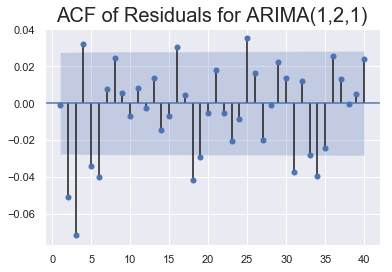

In [28]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero=False, lags=40)
plt.title('ACF of Residuals for ARIMA(1,2,1)', size=20)
plt.show()

## ARIMAX 

In [29]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog=df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Sun, 15 Dec 2019   AIC                          55217.112
Time:                        16:20:48   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5862      2.655     -0.221      0.825      -5.791       4.618
spx                      0.0011      0.002      0.450      0.653      -0.004       0.006
ar.L1.D.market_value     0.7456      0.070     10.578      0.000       0.607       0.884
ma.L1.D.market_value    -0.7917      0.065    -12.274      0.000      -0.918      -0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3412           +0.0000j            1.3412            0.0000
MA.1            1.2632           +0.0000j            1.2632            0.0000
-----------------------------------------------------------------------------
"""

SPX fails to be statistically significant => Try German DAX instead.

In [30]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog=df.dax, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.662
Method:                       css-mle   S.D. of innovations             59.133
Date:                Sun, 15 Dec 2019   AIC                          55217.323
Time:                        16:23:41   BIC                          55249.929
Sample:                    01-10-1994   HQIC                         55228.749
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7996      2.107      0.380      0.704      -3.330       4.929
dax                  -4.617e-05      0.000     -0.115      0.908      -0.001       0.001
ar.L1.D.market_value     0.7474      0.070     10.634      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.352      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3381           +0.0000j            1.3381            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

Even worse